## Clustering

### 1. Hierarchical Clustering

In [1]:
library(ISLR)
data(Auto)

In [2]:
X = Auto[, c(1:7)]

In [3]:
library(cluster)
# complete linkage
hc.complete = hclust(dist(X), method = 'complete')
sil.complete = silhouette(cutree(hc.complete, h=1000), dist(X))

# average linkage
hc.average = hclust(dist(X), method = 'average')
sil.average = silhouette(cutree(hc.average, h=600), dist(X))

# single linkage
hc.single = hclust(dist(X), method = 'single')
sil.single = silhouette(cutree(hc.single, h=120), dist(X))

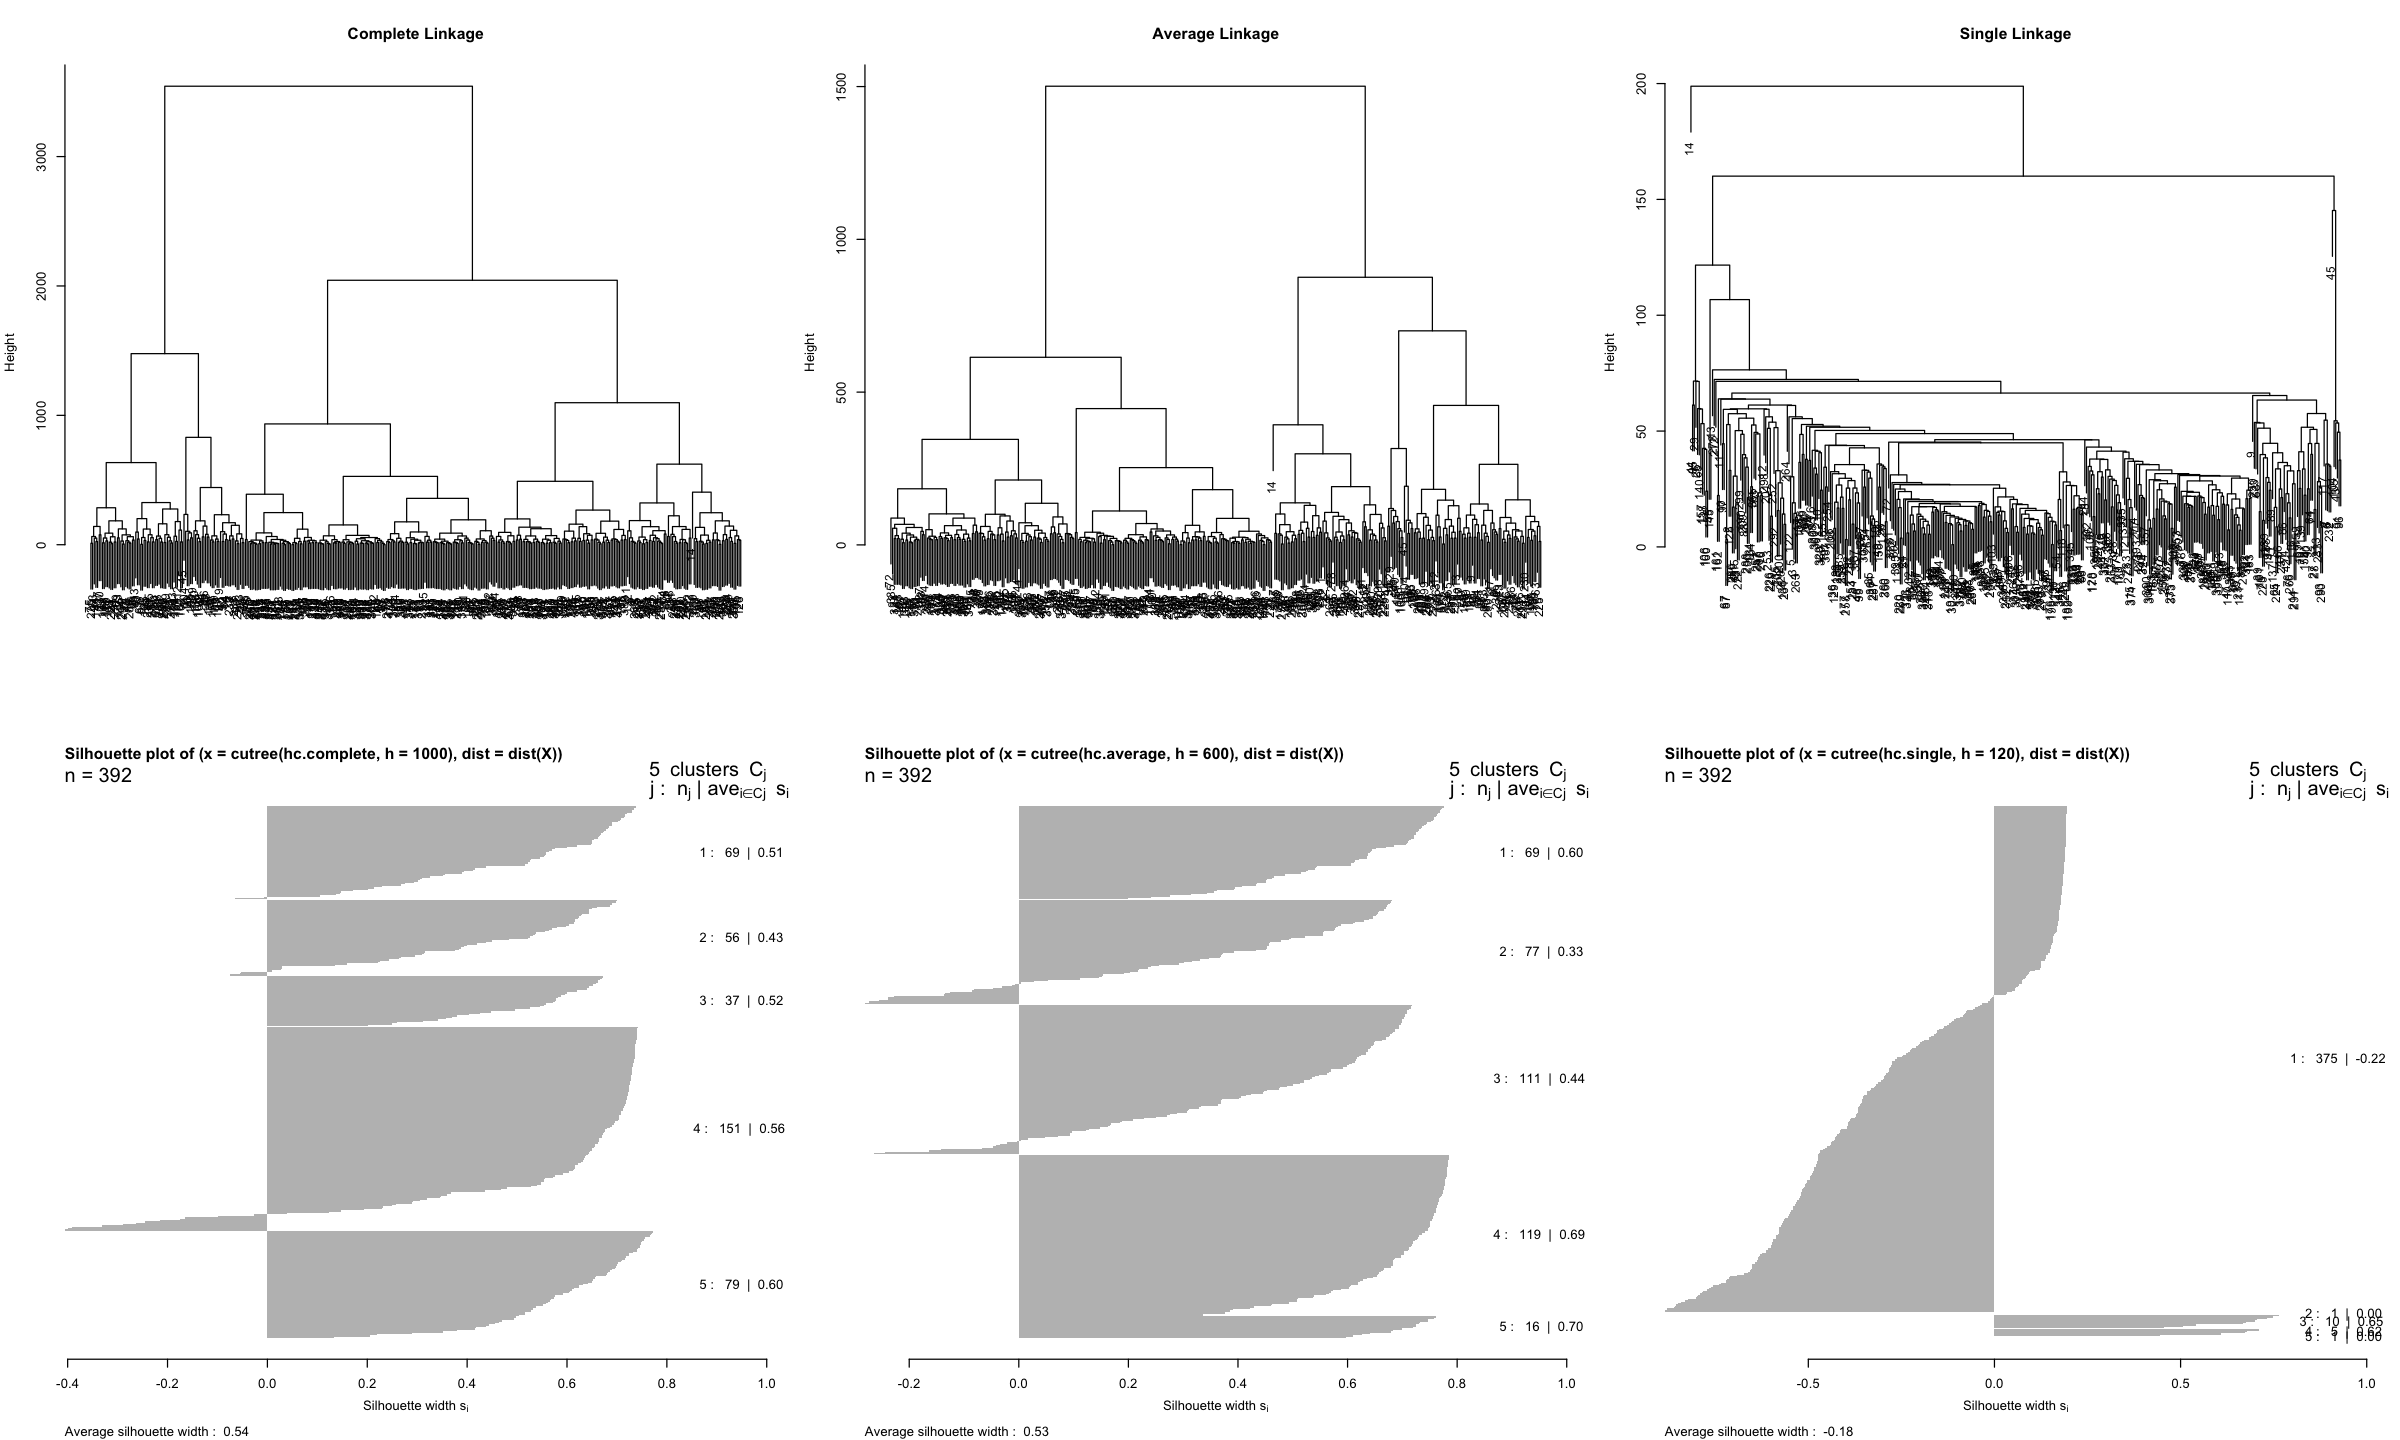

In [5]:
par(mfrow=c(2,3))
options(repr.plot.width=20, repr.plot.height=12)
plot(hc.complete,main="Complete Linkage", xlab="", sub="", cex=.9)
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)
plot(sil.complete)
plot(sil.average)
plot(sil.single)

Based on the average silhouette width, the complete linkage HC performs best, and then the average linkage HC's average silhouette width is very close to the complete linkage HC. From the dendrogram of the single linkage HC, we can know that it is severely affected by the outliers, and from the silhouette plot, we can see that there are lots of points misclustered (which has negative silhouette width) and the average silhouette width is negative which indicates the clustering makes no sense.

### 2. Model-based Clustering

In [7]:
library(mclust)

In [8]:
Xs = scale(as.matrix(X))
auto.gmm = Mclust(Xs)
t(round(auto.gmm$BIC, 0))

Bayesian Information Criterion (BIC): 
        1     2     3     4     5     6     7     8     9
EII -7828 -6214 -5768 -5371 -5289 -5231 -5137 -4960 -4899
VII -7828 -6159 -5725 -5381 -5203 -5100 -5050 -4906 -4823
EEI -7864 -5932 -4056 -3891 -3736 -3820 -3806 -3478 -3387
VEI -7864 -5896 -4026 -3737    NA    NA    NA    NA    NA
EVI -7864    NA    NA    NA    NA    NA    NA    NA    NA
VVI -7864    NA    NA    NA    NA    NA    NA    NA    NA
EEE -4498 -4220 -4180 -3221 -3143 -3115 -3146 -2727 -2950
VEE -4498 -4182 -4077    NA    NA    NA    NA    NA    NA
EVE -4498    NA    NA    NA    NA    NA    NA    NA    NA
VVE -4498    NA    NA    NA    NA    NA    NA    NA    NA
EEV -4498 -3710 -3058 -3138 -1248    NA    NA    NA    NA
VEV -4498 -3583 -2748 -2701    NA    NA    NA    NA    NA
EVV -4498    NA    NA    NA    NA    NA    NA    NA    NA
VVV -4498    NA    NA    NA    NA    NA    NA    NA    NA

Top 3 models based on the BIC criterion: 
5,EEV 4,VEV 8,EEE 
-1248 -2701 -2727 

According to BIC, the best choice of model is EEV and the number of clusters is 5. The assumption of EEV, 5 is 

- there are totally 5 clusters, which means $K = 5$;

- the points in each cluster come from a normal distribution with mean $\mu_k$ and variance $\Sigma_k$, for $k=1,..., 5$;

- each cluster has equal volume, equal shape and variant orientation, which means $\Sigma_k = \lambda D_kAD_k^T$ for $k = 1, ..., 5$.

### 3. Non-Convex Clustering  - Spectral Clustering

In [10]:
library(kernlab)

In [11]:
X = as.matrix(X)
Xs = scale(X)
sc.cent3 = specc(Xs, centers = 3)
sc.cent4 = specc(Xs, centers = 4)
sc.cent5 = specc(Xs, centers = 5)

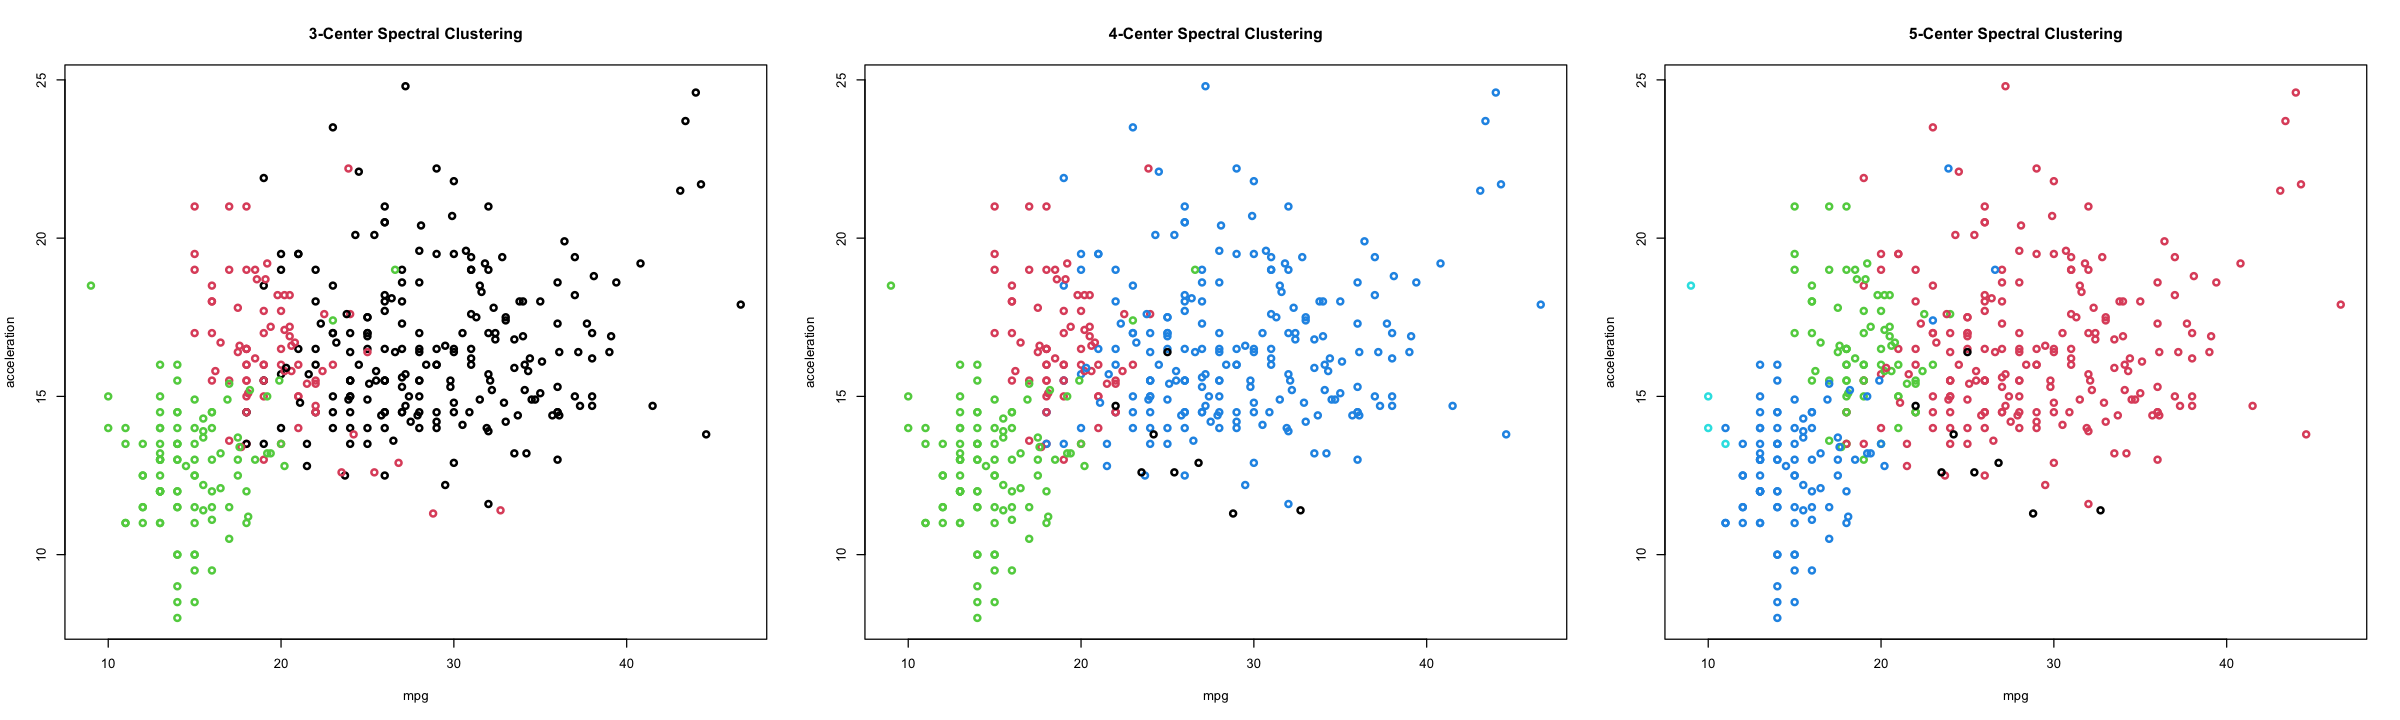

In [12]:
par(mfrow = c(1, 3))
options(repr.plot.width=20, repr.plot.height=6)
plot.idx = c(1, 6)
plot(X[, plot.idx], col = sc.cent3, lwd = 2, main = '3-Center Spectral Clustering')
plot(X[, plot.idx], col = sc.cent4, lwd = 2, main = '4-Center Spectral Clustering')
plot(X[, plot.idx], col = sc.cent5, lwd = 2, main = '5-Center Spectral Clustering')

I used spetral clustering which is a non-clustering model and tried 3, 4, and 5 centers for spetral clustering. We can find that there is no obvious clustering difference among 3, 4 and 5 centers.

### 4. Result Comparison

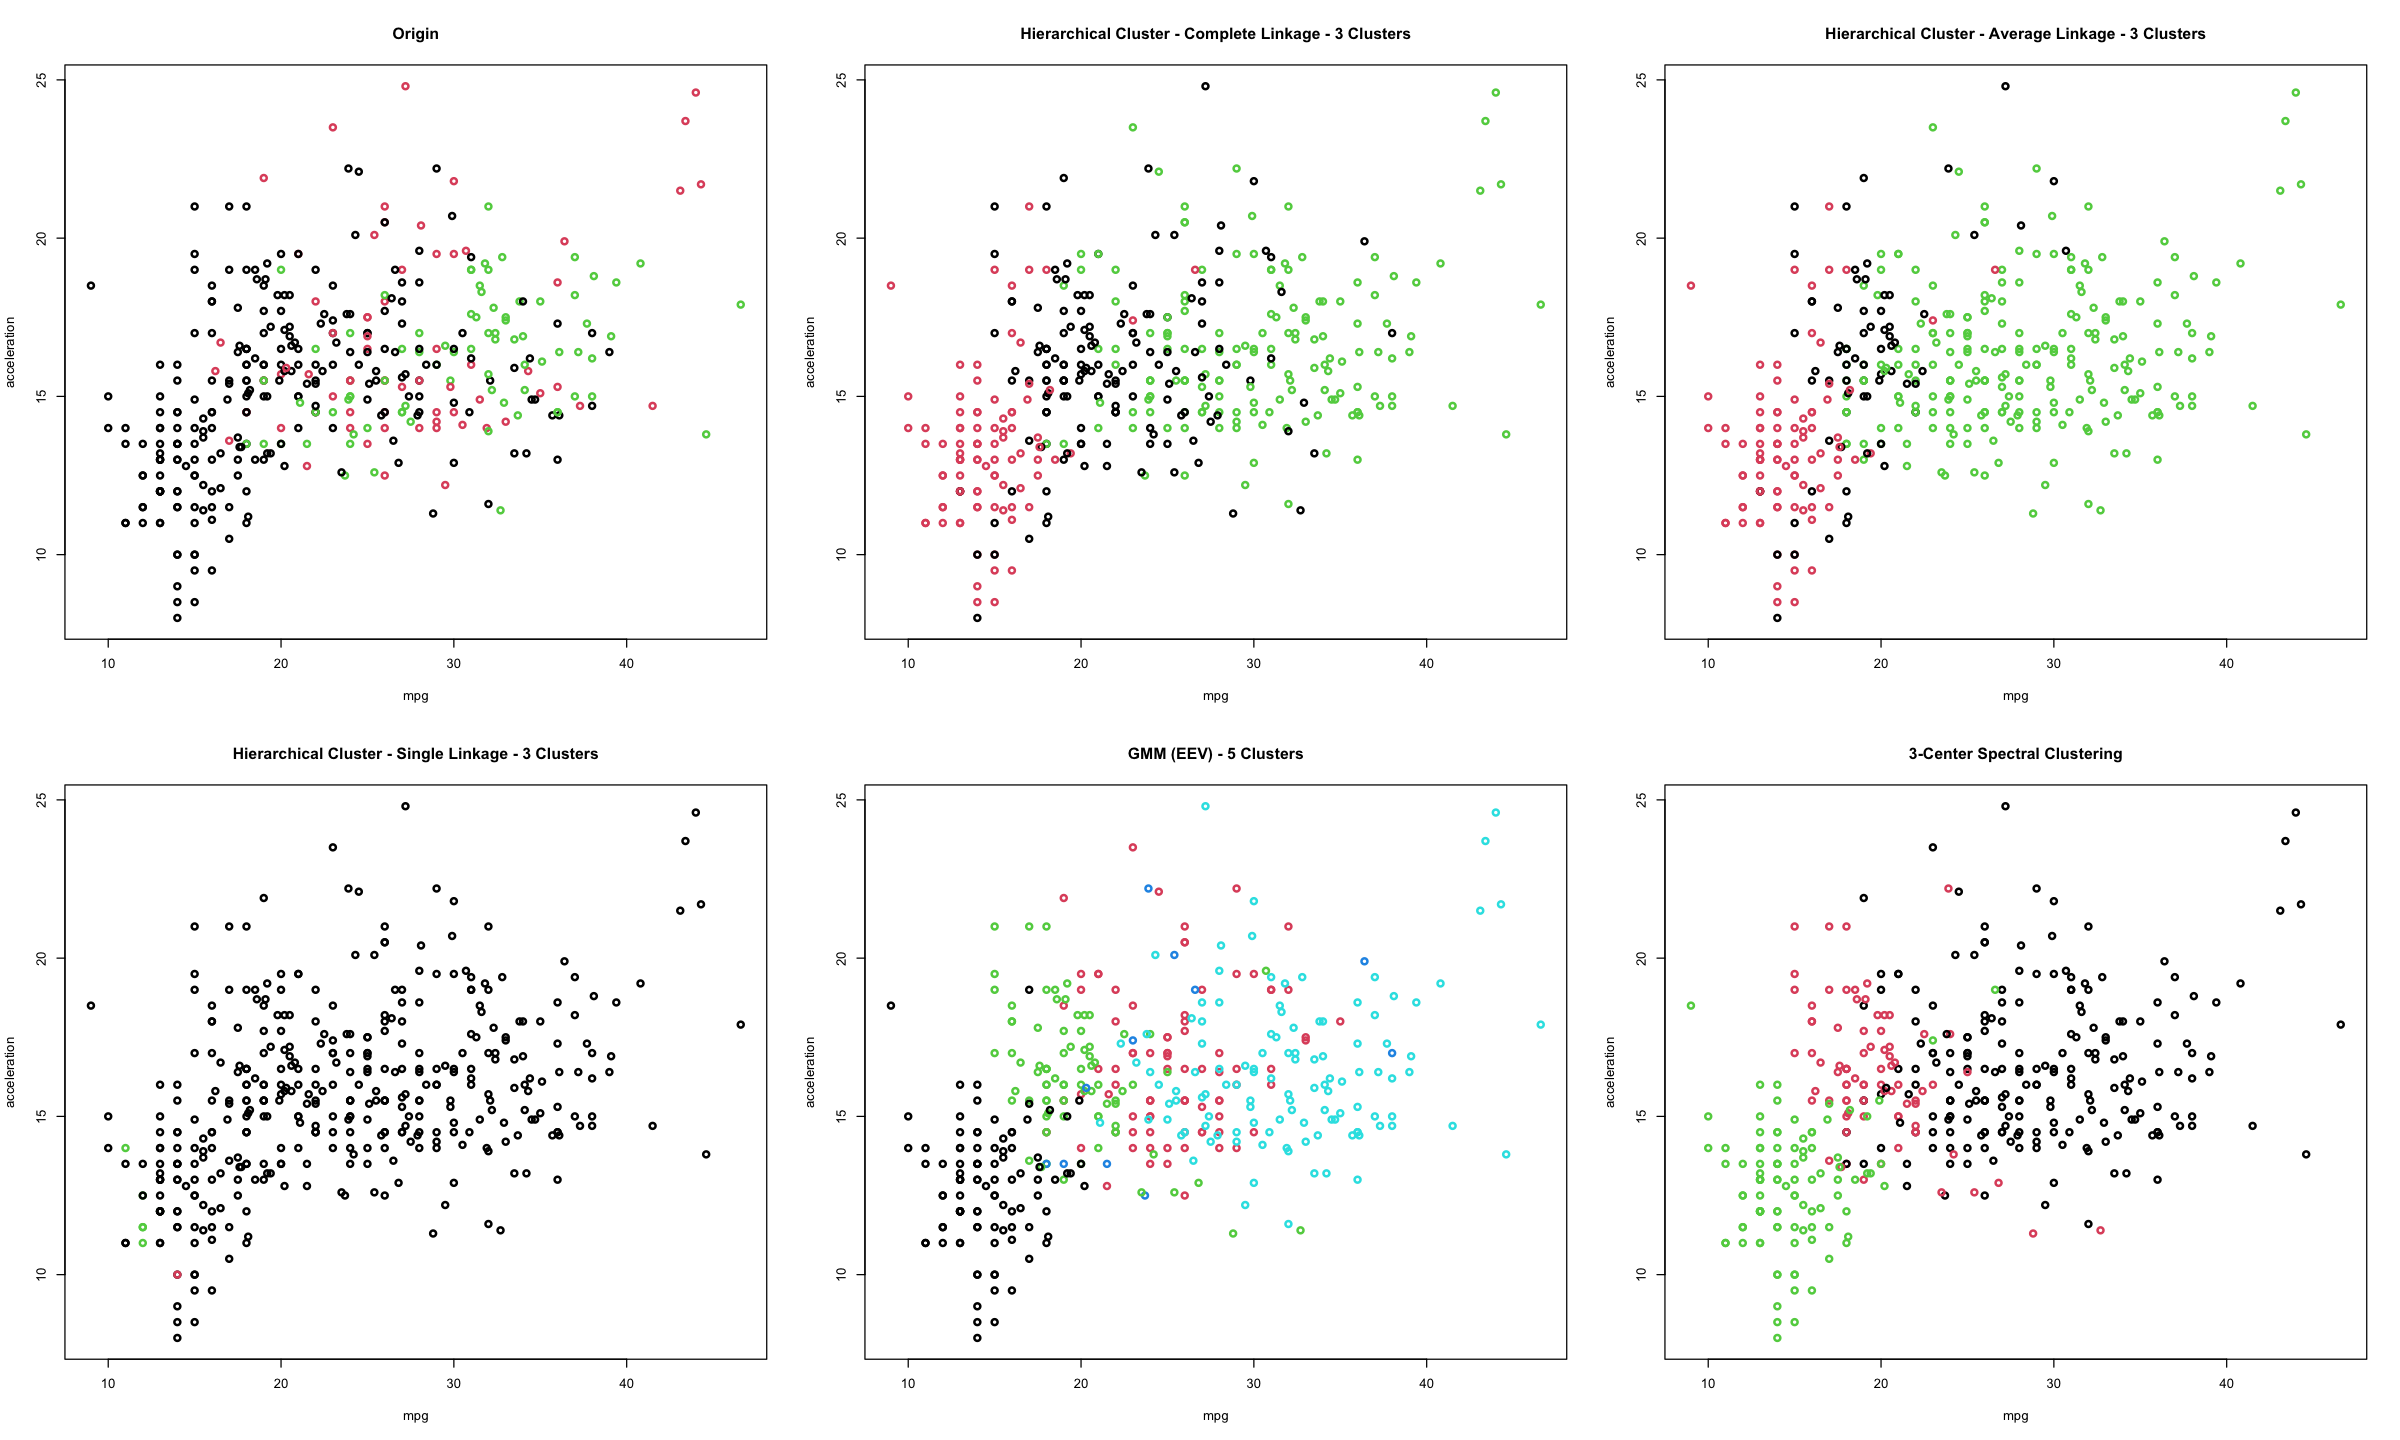

In [13]:
options(repr.plot.width = 20, repr.plot.height=12)
par(mfrow=c(2, 3))
plot.idx = c(1, 6)
plot(X[, plot.idx], col = Auto$origin, lwd = 2, main = 'Origin')
hc.complete.cent3 = cutree(hc.complete, h = 1800)
plot(X[, plot.idx], col = hc.complete.cent3, lwd = 2, main = 'Hierarchical Cluster - Complete Linkage - 3 Clusters')
hc.single.cent3 = cutree(hc.average, h = 800)
plot(X[, plot.idx], col = hc.single.cent3, lwd = 2, main = 'Hierarchical Cluster - Average Linkage - 3 Clusters')
hc.single.cent3 = cutree(hc.single, h = 150)
plot(X[, plot.idx], col = hc.single.cent3, lwd = 2, main = 'Hierarchical Cluster - Single Linkage - 3 Clusters')
plot(X[, plot.idx], col = auto.gmm$classification, lwd = 2, main = 'GMM (EEV) - 5 Clusters')
plot(X[, plot.idx], col = sc.cent3, lwd = 2, main = '3-Center Spectral Clustering')

According the the clustering results projected on `accelaration` and `mpg` two directions, it can be seen that 

- The single linkage hierarchical clustering performs worst. Due to the outliers, almost all points are assigned to one cluster.

- All the other clustering models, including complete linkage hierarchical clustering, average linkage hierarchical clustering, GMM (EEV, 5) and spetral clustering give similar clustering results.

- There are some difference between the `origin` and the clustering results given by complete linkage hierarchical clustering, average linkage hierarchical clustering, GMM (EEV, 5) and spetral clustering. Since the `origin`'s are mixed up when the predictors' values are around the middle, the clustering is not able to classify these points well. But, to some extent, the clusters given by all models except single linkage HC corresponds to the `origin` classes.